<a href="https://colab.research.google.com/github/navaworkingspaces-collab/challengeone-data-science/blob/main/Challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Challenge 1 Data Science**

##🚀🚀Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.sample(10)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
1900,Balón de baloncesto,Deportes y diversión,59200.0,1300.0,09/05/2020,Izabela de León,Bogotá,4,Tarjeta de crédito,1,4.60971,-74.08175
1578,Pandereta,Instrumentos musicales,55300.0,5300.0,20/04/2021,Juliana Costa,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
203,Muñeca bebé,Juguetes,59600.0,7900.0,27/01/2023,Camila Rivera,Bogotá,2,Tarjeta de crédito,1,4.60971,-74.08175
1512,Cubo mágico 8x8,Juguetes,7800.0,0.0,03/12/2020,Beatriz Morales,Bogotá,5,Tarjeta de crédito,2,4.60971,-74.08175
1925,Guitarra eléctrica,Instrumentos musicales,683600.0,36600.0,15/11/2022,Mariana Herrera,Medellín,4,Tarjeta de crédito,1,6.25184,-75.56359
139,Sofá reclinable,Muebles,621800.0,31300.0,21/01/2022,Juliana Costa,Medellín,5,Cupón,1,6.25184,-75.56359
1921,Set de ollas,Artículos para el hogar,110300.0,4100.0,15/08/2020,Juan Fernandez,Medellín,5,Tarjeta de crédito,5,6.25184,-75.56359
110,Ciencia de datos con Python,Libros,43100.0,0.0,10/12/2022,Mariana Herrera,Medellín,1,Tarjeta de crédito,10,6.25184,-75.56359
1255,Sofá reclinable,Muebles,649900.0,32800.0,27/01/2023,Felipe Santos,Medellín,4,Tarjeta de crédito,1,6.25184,-75.56359
1374,Cubo mágico 8x8,Juguetes,16000.0,1500.0,13/09/2021,Camila Rivera,Leticia,5,Tarjeta de crédito,10,-4.21528,-69.94056


##💵💵Ingreso total por tienda

In [2]:
suma_ventas_t1 = tienda1['Precio'].sum()
suma_ventas_t2 = tienda2['Precio'].sum()
suma_ventas_t3 = tienda3['Precio'].sum()
suma_ventas_t4 = tienda4['Precio'].sum()

pd.set_option('display.float_format', '{:,.0f}'.format)

print("VENTAS POR TIENDA:\n")
print("==============================")
print(f"{'TIENDA':<15} {'VENTAS TOTALES':<15}")
print("-" * 30)

ventas_tiendas = pd.DataFrame({
    'TIENDA': ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4'],
    'VENTAS TOTALES': [suma_ventas_t1, suma_ventas_t2, suma_ventas_t3, suma_ventas_t4]
})

for index, row in ventas_tiendas.iterrows():
    print(f"{row['TIENDA']:<15} ${row['VENTAS TOTALES']:>,.0f}")


print("-" * 30)
total_general = suma_ventas_t1 + suma_ventas_t2 + suma_ventas_t3 + suma_ventas_t4
print(f"{'TOTAL GENERAL':<15} ${total_general:>,.0f}")




VENTAS POR TIENDA:

TIENDA          VENTAS TOTALES 
------------------------------
TIENDA 1        $1,150,880,400
TIENDA 2        $1,116,343,500
TIENDA 3        $1,098,019,600
TIENDA 4        $1,038,375,700
------------------------------
TOTAL GENERAL   $4,403,619,200


##💠💠Suma de ventas por categoría

In [3]:
print("CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA")
print("=" * 80)

categorias_t1 = tienda1.groupby('Categoría del Producto').size()
categorias_t2 = tienda2.groupby('Categoría del Producto').size()
categorias_t3 = tienda3.groupby('Categoría del Producto').size()
categorias_t4 = tienda4.groupby('Categoría del Producto').size()

categorias_df = pd.DataFrame({
    'Tienda 1': categorias_t1,
    'Tienda 2': categorias_t2,
    'Tienda 3': categorias_t3,
    'Tienda 4': categorias_t4
}).fillna(0)

categorias_df['Total_Categoria'] = categorias_df.sum(axis=1)

categorias_df = categorias_df.sort_values('Total_Categoria', ascending=False)

print(f"{'CATEGORÍA':<25} {'TIENDA 1':<10} {'TIENDA 2':<10} {'TIENDA 3':<10} {'TIENDA 4':<10}")
print("-" * 80)

for categoria, row in categorias_df.iterrows():
    print(f"{categoria:<25} {int(row['Tienda 1']):<10} {int(row['Tienda 2']):<10} {int(row['Tienda 3']):<10} {int(row['Tienda 4']):<10}")

print("-" * 80)
total_t1 = int(categorias_df['Tienda 1'].sum())
total_t2 = int(categorias_df['Tienda 2'].sum())
total_t3 = int(categorias_df['Tienda 3'].sum())
total_t4 = int(categorias_df['Tienda 4'].sum())

print(f"{'TOTAL POR TIENDA':<25} {total_t1:<10} {total_t2:<10} {total_t3:<10} {total_t4:<10}")

CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA
CATEGORÍA                 TIENDA 1   TIENDA 2   TIENDA 3   TIENDA 4  
--------------------------------------------------------------------------------
Muebles                   465        442        499        480       
Electrónicos              448        422        451        451       
Juguetes                  324        313        315        338       
Electrodomésticos         312        305        278        254       
Deportes y diversión      284        275        277        277       
Instrumentos musicales    182        224        177        170       
Libros                    173        197        185        187       
Artículos para el hogar   171        181        177        201       
--------------------------------------------------------------------------------
TOTAL POR TIENDA          2359       2359       2359       2358      


##👍👍Valoración promedio por tienda

In [4]:
print("VALORACIÓN POR TIENDA")
print("=" * 25)

promedio_t1 = tienda1['Calificación'].mean()
promedio_t2 = tienda2['Calificación'].mean()
promedio_t3 = tienda3['Calificación'].mean()
promedio_t4 = tienda4['Calificación'].mean()

calificaciones_promedio = pd.DataFrame({'TIENDA': ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4'],
                                        'VALORACIÓN PROMEDIO': [promedio_t1, promedio_t2, promedio_t3, promedio_t4]})

calificaciones_promedio['VALORACIÓN PROMEDIO'] = calificaciones_promedio['VALORACIÓN PROMEDIO'].round(2)

calificaciones_promedio = calificaciones_promedio.sort_values('VALORACIÓN PROMEDIO', ascending=False)


for index, row in calificaciones_promedio.iterrows():
    print(f"{row['TIENDA']:<10} {row['VALORACIÓN PROMEDIO']:>6.2F}")



VALORACIÓN POR TIENDA
TIENDA 3     4.05
TIENDA 2     4.04
TIENDA 4     4.00
TIENDA 1     3.98


##Productos ⬆️⬆️más y ⬇️⬇️menos vendidos

In [5]:
print("ANÁLISIS DE PRODUCTOS POR TIENDA")
print("=" * 147)

print("\nTOP 5 PRODUCTOS MÁS VENDIDOS")
print("-" * 147)

mas_vendidos_t1 = tienda1.groupby('Producto').size().sort_values(ascending=False).head(5)
mas_vendidos_t2 = tienda2.groupby('Producto').size().sort_values(ascending=False).head(5)
mas_vendidos_t3 = tienda3.groupby('Producto').size().sort_values(ascending=False).head(5)
mas_vendidos_t4 = tienda4.groupby('Producto').size().sort_values(ascending=False).head(5)

lista_t1_mas = list(mas_vendidos_t1.items())
lista_t2_mas = list(mas_vendidos_t2.items())
lista_t3_mas = list(mas_vendidos_t3.items())
lista_t4_mas = list(mas_vendidos_t4.items())

max_longitud_t1_mas = max([len(producto) for producto, _ in lista_t1_mas]) if lista_t1_mas else 0
max_longitud_t2_mas = max([len(producto) for producto, _ in lista_t2_mas]) if lista_t2_mas else 0
max_longitud_t3_mas = max([len(producto) for producto, _ in lista_t3_mas]) if lista_t3_mas else 0
max_longitud_t4_mas = max([len(producto) for producto, _ in lista_t4_mas]) if lista_t4_mas else 0

ancho_producto_mas = max(15, max_longitud_t1_mas, max_longitud_t2_mas, max_longitud_t3_mas, max_longitud_t4_mas) + 2

print(f"{'TIENDA 1':<{ancho_producto_mas+7}} {'TIENDA 2':<{ancho_producto_mas+9}} {'TIENDA 3':<{ancho_producto_mas+7}} {'TIENDA 4':<{ancho_producto_mas+7}}")
print(f"{'PRODUCTO':<{ancho_producto_mas}} {'UNID':<6} {'PRODUCTO':<{ancho_producto_mas}} {'UNID':<8} {'PRODUCTO':<{ancho_producto_mas}} {'UNID':<6} {'PRODUCTO':<{ancho_producto_mas}} {'UNID':<6}")
print("-" * (ancho_producto_mas+10)*4)

for i in range(5):
    if i < len(lista_t1_mas):
        producto1, cantidad1 = lista_t1_mas[i]
        linea_t1 = f"{producto1:<{ancho_producto_mas}} {cantidad1:>4}"
    else:
        linea_t1 = f"{'':<{ancho_producto_mas}} {'':>4}"

    if i < len(lista_t2_mas):
        producto2, cantidad2 = lista_t2_mas[i]
        linea_t2 = f"{producto2:<{ancho_producto_mas}} {cantidad2:>4}"
    else:
        linea_t2 = f"{'':<{ancho_producto_mas}} {'':>4}"

    if i < len(lista_t3_mas):
        producto3, cantidad3 = lista_t3_mas[i]
        linea_t3 = f"{producto3:<{ancho_producto_mas}} {cantidad3:>4}"
    else:
        linea_t3 = f"{'':<{ancho_producto_mas}} {'':>4}"

    if i < len(lista_t4_mas):
        producto4, cantidad4 = lista_t4_mas[i]
        linea_t4 = f"{producto4:<{ancho_producto_mas}} {cantidad4:>4}"
    else:
        linea_t4 = f"{'':<{ancho_producto_mas}} {'':>4}"

    print(f"{linea_t1}    {linea_t2}    {linea_t3}    {linea_t4}")

# MENOS VENDIDOS
print("\n\nTOP 5 PRODUCTOS MENOS VENDIDOS")
print("-" * 147)

menos_vendidos_t1 = tienda1.groupby('Producto').size().sort_values(ascending=True).head(5)
menos_vendidos_t2 = tienda2.groupby('Producto').size().sort_values(ascending=True).head(5)
menos_vendidos_t3 = tienda3.groupby('Producto').size().sort_values(ascending=True).head(5)
menos_vendidos_t4 = tienda4.groupby('Producto').size().sort_values(ascending=True).head(5)

lista_t1_menos = list(menos_vendidos_t1.items())
lista_t2_menos = list(menos_vendidos_t2.items())
lista_t3_menos = list(menos_vendidos_t3.items())
lista_t4_menos = list(menos_vendidos_t4.items())

max_longitud_t1_menos = max([len(producto) for producto, _ in lista_t1_menos]) if lista_t1_menos else 0
max_longitud_t2_menos = max([len(producto) for producto, _ in lista_t2_menos]) if lista_t2_menos else 0
max_longitud_t3_menos = max([len(producto) for producto, _ in lista_t3_menos]) if lista_t3_menos else 0
max_longitud_t4_menos = max([len(producto) for producto, _ in lista_t4_menos]) if lista_t4_menos else 0

ancho_producto_menos = max(15, max_longitud_t1_menos, max_longitud_t2_menos, max_longitud_t3_menos, max_longitud_t4_menos) + 2

print(f"{'TIENDA 1':<{ancho_producto_menos+7}} {'TIENDA 2':<{ancho_producto_menos+9}} {'TIENDA 3':<{ancho_producto_menos+7}} {'TIENDA 4':<{ancho_producto_menos+7}}")
print(f"{'PRODUCTO':<{ancho_producto_menos}} {'UNID':<6} {'PRODUCTO':<{ancho_producto_menos}} {'UNID':<8} {'PRODUCTO':<{ancho_producto_menos}} {'UNID':<6} {'PRODUCTO':<{ancho_producto_menos}} {'UNID':<6}")
print("-" * (ancho_producto_menos+10)*4)

for i in range(5):
    if i < len(lista_t1_menos):
        producto1, cantidad1 = lista_t1_menos[i]
        linea_t1 = f"{producto1:<{ancho_producto_menos}} {cantidad1:>4}"
    else:
        linea_t1 = f"{'':<{ancho_producto_menos}} {'':>4}"

    if i < len(lista_t2_menos):
        producto2, cantidad2 = lista_t2_menos[i]
        linea_t2 = f"{producto2:<{ancho_producto_menos}} {cantidad2:>4}"
    else:
        linea_t2 = f"{'':<{ancho_producto_menos}} {'':>4}"

    if i < len(lista_t3_menos):
        producto3, cantidad3 = lista_t3_menos[i]
        linea_t3 = f"{producto3:<{ancho_producto_menos}} {cantidad3:>4}"
    else:
        linea_t3 = f"{'':<{ancho_producto_menos}} {'':>4}"

    if i < len(lista_t4_menos):
        producto4, cantidad4 = lista_t4_menos[i]
        linea_t4 = f"{producto4:<{ancho_producto_menos}} {cantidad4:>4}"
    else:
        linea_t4 = f"{'':<{ancho_producto_menos}} {'':>4}"

    print(f"{linea_t1}    {linea_t2}    {linea_t3}    {linea_t4}")

ANÁLISIS DE PRODUCTOS POR TIENDA

TOP 5 PRODUCTOS MÁS VENDIDOS
---------------------------------------------------------------------------------------------------------------------------------------------------
TIENDA 1                           TIENDA 2                             TIENDA 3                           TIENDA 4                          
PRODUCTO                    UNID   PRODUCTO                    UNID     PRODUCTO                    UNID   PRODUCTO                    UNID  
----------------------------------------------------------------------------------------------------------------------------------------------------
Armario                       60    Iniciando en programación     65    Kit de bancas                 57    Cama box                      62
TV LED UHD 4K                 60    Microondas                    62    Mesa de comedor               56    Cubertería                    59
Microondas                    60    Batería                       61    Ca

##Valor del envío promedio 🚚🚚

In [6]:
print("VALOR DEL ENVÍO PROMEDIO")
print("=" * 30)

promedio_envio_t1 = tienda1['Costo de envío'].mean()
promedio_envio_t2 = tienda2['Costo de envío'].mean()
promedio_envio_t3 = tienda3['Costo de envío'].mean()
promedio_envio_t4 = tienda4['Costo de envío'].mean()

promedio_general = (promedio_envio_t1 + promedio_envio_t2 + promedio_envio_t3 + promedio_envio_t4) / 4

envio_promedio_df = pd.DataFrame({
    'TIENDA': ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4', 'PROMEDIO GENERAL'],
    'VALOR PROMEDIO ENVÍO': [promedio_envio_t1, promedio_envio_t2, promedio_envio_t3, promedio_envio_t4, promedio_general]
})

envio_promedio_df['VALOR PROMEDIO ENVÍO'] = envio_promedio_df['VALOR PROMEDIO ENVÍO'].round(0)

for index, row in envio_promedio_df.iterrows():
    print(f"{row['TIENDA']:<20} ${row['VALOR PROMEDIO ENVÍO']:>10,.0f}")

VALOR DEL ENVÍO PROMEDIO
TIENDA 1             $    26,019
TIENDA 2             $    25,216
TIENDA 3             $    24,806
TIENDA 4             $    23,459
PROMEDIO GENERAL     $    24,875


##📊📈Gráficos

In [7]:
import matplotlib.pyplot as plt

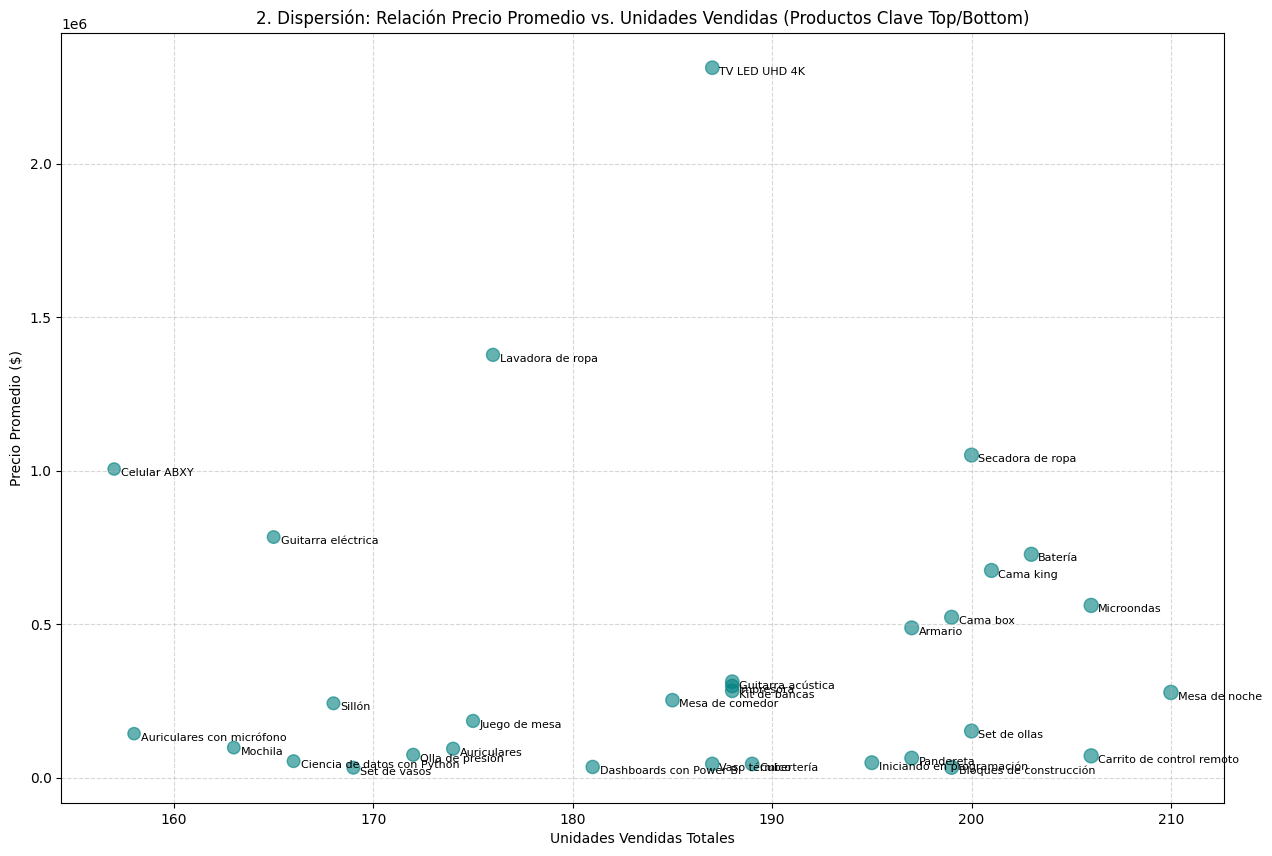

In [25]:
productos_clave_nombres = set()
for lista in [lista_t1_mas, lista_t2_mas, lista_t3_mas, lista_t4_mas,
              lista_t1_menos, lista_t2_menos, lista_t3_menos, lista_t4_menos]:
    for nombre, _ in lista:
        productos_clave_nombres.add(nombre)

df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_productos_clave = df_total[df_total['Producto'].isin(productos_clave_nombres)]

unidades_vendidas = df_productos_clave.groupby('Producto').size().reset_index(name='Unidades Vendidas')
precio_promedio = df_productos_clave.groupby('Producto')['Precio'].mean().reset_index(name='Precio Promedio')

productos_clave_df = pd.merge(unidades_vendidas, precio_promedio, on='Producto')

plt.figure(figsize=(15, 10))
plt.scatter(productos_clave_df['Unidades Vendidas'],
            productos_clave_df['Precio Promedio'],
            s=productos_clave_df['Unidades Vendidas'] * 0.5,
            alpha=0.6,
            color='teal')


for i, row in productos_clave_df.iterrows():
    plt.annotate(row['Producto'],
                 (row['Unidades Vendidas'], row['Precio Promedio']),
                 textcoords="offset points",
                 xytext=(5, -5),
                 ha='left',
                 fontsize=8)

plt.title('2. Dispersión: Relación Precio Promedio vs. Unidades Vendidas (Productos Clave Top/Bottom)')
plt.xlabel('Unidades Vendidas Totales')
plt.ylabel('Precio Promedio ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

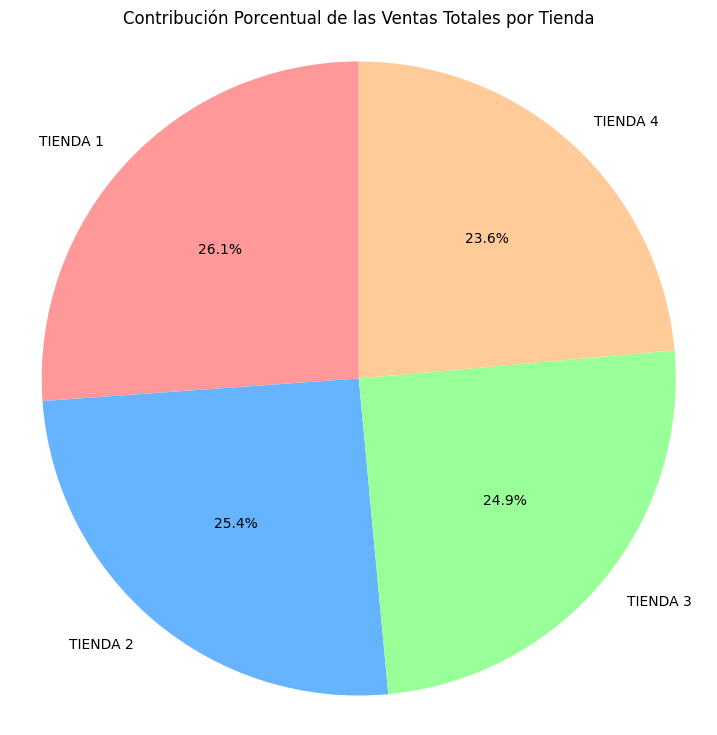

In [20]:
plt.figure(figsize=(9, 9))
plt.pie(ventas_tiendas['VENTAS TOTALES'],
        labels=ventas_tiendas['TIENDA'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Contribución Porcentual de las Ventas Totales por Tienda')
plt.axis('equal')
plt.show()

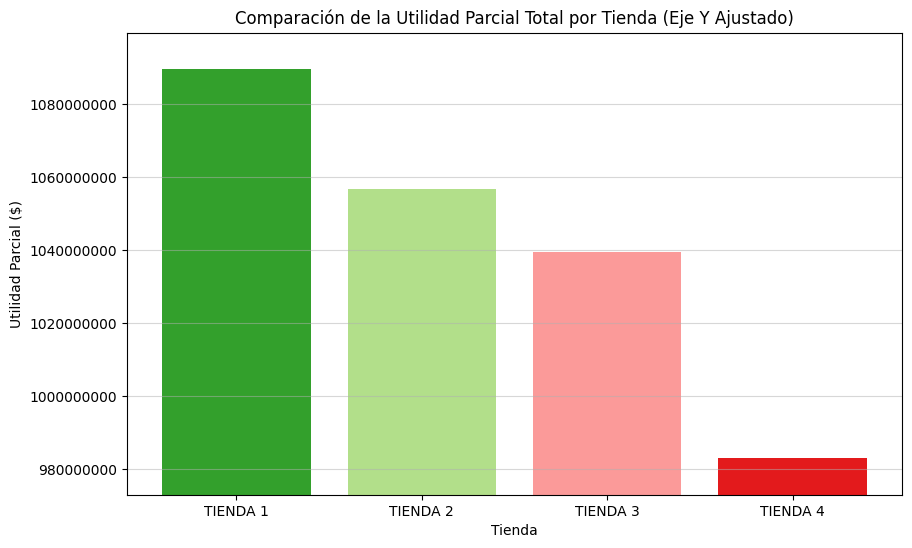

In [15]:
etiquetas_utilidad = utilidad_df['TIENDA']
valores_utilidad = utilidad_df['UTILIDAD PARCIAL']
valor_minimo_utilidad = min(valores_utilidad) - 10000000

plt.figure(figsize=(10, 6))
plt.bar(etiquetas_utilidad,
        valores_utilidad,
        color=['#33a02c', '#b2df8a', '#fb9a99', '#e31a1c'])
plt.ylim(valor_minimo_utilidad, max(valores_utilidad) + 10000000)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparación de la Utilidad Parcial Total por Tienda (Eje Y Ajustado)')
plt.xlabel('Tienda')
plt.ylabel('Utilidad Parcial ($)')
plt.grid(axis='y', alpha=0.5)
plt.show()